In [1]:
from fastbook import DataBlock, ImageBlock, CategoryBlock, RandomSplitter, parent_label, Resize, DataLoaders, DataLoader, PILImage
from fastcore.all import L
from fastai.vision.all import Image, resize_images, verify_images, get_image_files, cnn_learner, resnet18, resnet34, resnet50, error_rate, ClassificationInterpretation, accuracy
from fastai.vision.learner import vision_learner
from fastai.vision.widgets import ImageClassifierCleaner, shutil
from fastai.callback.schedule import fine_tune
from pathlib import Path
from time import sleep

path = Path('E:/gDrive/38.Pic/train/t1')
# path = Path('E:/models/.fastai/data/cat')

dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize((540, 360), method='squish')]
).dataloaders(path,bs=13)
# dls.show_batch(max_n=30)

d:\Python312\Lib\site-packages\torch\_tensor.py:1418: UserWarning: expandable_segments not supported on this platform (Triggered internally at ..\c10/cuda/CUDAAllocatorConfig.h:30.)
  ret = func(*args, **kwargs)


In [2]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,time
0,1.368268,0.536877,0.181818,00:57


epoch,train_loss,valid_loss,error_rate,time
0,0.476251,0.370862,0.171717,00:55
1,0.289517,0.276802,0.111111,00:54
2,0.224055,0.216901,0.090909,00:54
3,0.198887,0.125764,0.050505,00:54
4,0.129757,0.120605,0.050505,00:54


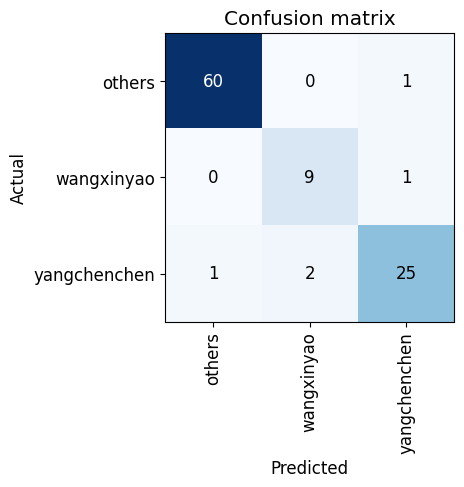

In [3]:
# Improving the model: data cleaning and augmentations
# First, let’s see the model’s errors: whether it can’t distinguish corgi from husky or pomeranian from retriever. We can use confusion_matrix for it.
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

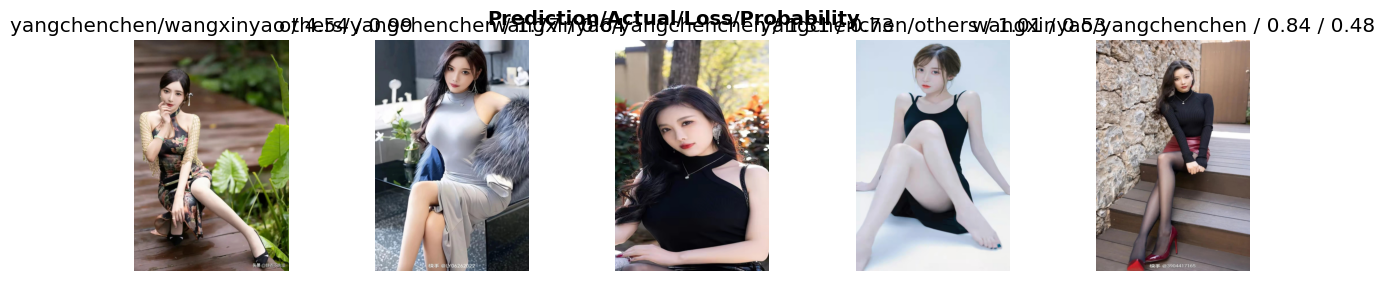

In [4]:
# images with the highest loss: it could be cases where the model was wrong with high confidence or correct but with low confidence.
interp.plot_top_losses(5, nrows=1)

In [5]:
#clean
cleaner = ImageClassifierCleaner(learn)
cleaner

In [6]:
# After each category, you can run the following code to fix issues: delete the image or move it to the correct folder.
for idx in cleaner.delete(): cleaner.fns[idx].unlink()
for idx,breed in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/breed)

In [8]:
#now, we can train our model again:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(3)

epoch,train_loss,valid_loss,accuracy,time
0,1.423336,0.292062,0.880000,01:02


epoch,train_loss,valid_loss,accuracy,time
0,0.353504,0.240185,0.890000,01:04
1,0.316100,0.258806,0.930000,01:04
2,0.238076,0.246405,0.930000,01:04


In [7]:
# download model
learn.export('ycc2.pkl')

In [41]:
is_cc, _, probs = learn.predict(PILImage.create('E:/iDown/ph/w8.jpg'))
print(f"This is a: {is_cc}.")
print(probs)
print(f"Probability it's {is_cc}: {probs[0]:.4f}  {probs[1]:.4f}  {probs[2]:.1f}" )


This is a: yangchenchen.
tensor([3.2278e-09, 3.9835e-06, 1.0000e+00])
Probability it's yangchenchen: 0.0000  0.0000  1.0
